# Ejercicio de pig

In [1]:
%run pigmagic.py

Carpeta en la que estan los archivos

In [2]:
!ls files/*.csv

!echo 
!rm -r output

!echo 
!ls -la

files/scopus-2000-2013-cp.csv  files/scopus-2015-cp.csv
files/scopus-2006-2011-ar.csv  files/scopus-2016-ar.csv
files/scopus-2012-ar.csv       files/scopus-2016-cp.csv
files/scopus-2013-ar.csv       files/scopus-2017-ar.csv
files/scopus-2014-ar.csv       files/scopus-2017-cp.csv
files/scopus-2014-cp.csv       files/scopus-2018-ar.csv
files/scopus-2015-ar.csv       files/scopus-2018-cp.csv

rm: cannot remove 'output': No such file or directory

total 543056
drwxrwxrwx 1 wm wm      4096 Oct  5 18:20  .
drwxrwxrwx 1 wm wm      4096 Oct  5 15:07  ..
drwxrwxrwx 1 wm wm      4096 Sep 17 00:18  .git
-rwxrwxrwx 1 wm wm       100 Sep 16 20:36  .gitignore
drwxrwxrwx 1 wm wm      4096 Oct  5 15:14  .ipynb_checkpoints
-rwxrwxrwx 1 wm wm     28324 Sep 30 22:35 '01. Notas de clase - Hadoop con Java.ipynb'
-rwxrwxrwx 1 wm wm      1082 Sep 16 13:29  LICENSE
-rwxrwxrwx 1 wm wm       225 Sep 16 13:29  README.md
-rwxrwxrwx 1 wm wm      5981 Sep 30 23:45  Untitled.ipynb
-rwxrwxrwx 1 wm wm     15729 Oct  5

In [3]:
%%pig
files = load '/mnt/e/Notas de clase/apache-hive-course-master/files/*csv' as (line:chararray);
temp = limit files 10;
dump temp;

 as (line:chararray);Notas de clase/apache-hive-course-master/files/*csv' 
temp = limit files 10;
dump temp;
(Authors,Author Ids,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Access Type,Source,EID)
("Vancea B., Marchis A., Dinsoreanu M., Potolea R.","55975772100;57190179697;24474001700;23390581200;","Contradiction detection between opinions: From a big data perspective",2013,"Proceedings - 2013 IEEE 9th International Conference on Intelligent Computer Communication and Processing, ICCP 2013",,, 6646118,"259","266",,,10.1109/ICCP.2013.6646118,"https://www.scopus.com/inward/record.uri?eid=2-s2.0-84891076779&doi=10.1109%2fICCP.2013.6646118&partnerID=40&md5=66c750dbc77983dd145ff352e1a6aaea","Department of Computer Science, Technical University of Cluj-Napoca, Cluj-Napoca, Romania","Vancea, B., Department of Computer Science, Technical University of 

Quitar las cabeceras de los archivos

In [4]:
%%pig
sin_cabeceras = Filter files BY NOT SUBSTRING(line,0,7) MATCHES 'Authors';
temp = limit sin_cabeceras 10;
dump temp;

;in_cabeceras = Filter files BY NOT SUBSTRING(line,0,7) MATCHES 'Authors' 
temp = limit sin_cabeceras 10;
dump temp;
("Cao M., Guo C.","57201340394;7402497201;","Key technologies of big data and its development in intelligent ship",2017,"ACM International Conference Proceeding Series",,,,"61","65",,,10.1145/3175603.3175613,"https://www.scopus.com/inward/record.uri?eid=2-s2.0-85044343308&doi=10.1145%2f3175603.3175613&partnerID=40&md5=e6faf2208f638cfbdd3d5a0e0424b48d","College of Power Engineering, Naval University of Engineering, Wuhan, China","Cao, M., College of Power Engineering, Naval University of Engineering, Wuhan, China; Guo, C., College of Power Engineering, Naval University of Engineering, Wuhan, China","The application of big data techniques will contribute to the transforming and upgrading in shipbuilding industry and produce a profound influence in the development of intelligent ship. An overall framework of shipbuilding big data platform is established in this paper, which

### FORMAS EQUIVALENTES
`cabeceras = filter by substring(line,0,7) != 'Authors';`

## Sugerencia:
Usar CSVEstorage

In [5]:
%%pig

files = load '/mnt/e/Notas de clase/apache-hive-course-master/files/*csv' using org.apache.pig.piggybank.storage.CSVExcelStorage(',');
temp = foreach files generate $18; --$17 para ver las palabras claves, $0 para ver los autores
temp = limit temp 10;
dump temp;


 using org.apache.pig.piggybank.storage.CSVExcelStorage(',');/files/*csv' 
 para ver los autoresgenerate $18; --$17 para ver las palabras claves, $0 
temp = limit temp 10;
dump temp;
(Index Keywords)
(Analysis solution; Big datum; Distributed systems; opinion; Performance decay; Storage/retrieval; Structured approach; Unstructured documents; Communication; Information retrieval; Scalability; Reliability analysis)
(Application scenario; Benchmark suites; Big datum; Component based; Performance; Performance metrics; Security; Energy conservation; Engineering education; Fault tolerance; Scalability; Benchmarking)
(Effective algorithms; High dimensionality; Multi objective; Multi-objective problem; Paper analysis; Real-world; Searching techniques; Swarm Intelligence; Engineering education; Artificial intelligence)
(Big data applications; Data-intensive application; Improving performance; Memory bloats; Object-oriented design; Object-oriented programming languages; Performance degradation;

* Concatenar los registros de la columna de keywords e index Keywords y separarlos en vectores

In [6]:
%%pig
files = load '/mnt/e/Notas de clase/apache-hive-course-master/files/*csv' USING org.apache.pig.piggybank.storage.CSVExcelStorage(',');

--files = LIMIT files 3;

-- Separa las palabras claves del autor
keywords = foreach files generate CONCAT($17, ';', $18);

keywords = foreach keywords generate FLATTEN(TOKENIZE($0, ';'));
keywords = foreach keywords generate TRIM(LOWER($0));
keywords = FILTER keywords BY  NOT $0 matches 'Author Keywords';
keywords = FILTER keywords BY  NOT $0 matches 'Index Keywords';

-- keywords = FILTER keywords BY  SIZE($0) == 0;

grouped = GROUP keywords BY $0;
wordcount = FOREACH grouped GENERATE group, COUNT(keywords);
wordcount = ORDER wordcount by $1 desc;
s = LIMIT wordcount 25;

dump s;


-- keywords = foreach keywords generate STRSPLIT($0, ';', -1);
-- keywords = foreach keywords generate FLATTEN(*);
-- keywords = foreach keywords generate flatten();


--temp = LIMIT s 20;
--dump temp;

STORE wordcount INTO 'output/' USING PigStorage(',');


 USING org.apache.pig.piggybank.storage.CSVExcelStorage(',');/files/*csv' 

--files = LIMIT files 3;

-- Separa las palabras claves del autor
keywords = foreach files generate CONCAT($17, ';', $18);

keywords = foreach keywords generate FLATTEN(TOKENIZE($0, ';'));
keywords = foreach keywords generate TRIM(LOWER($0));
keywords = FILTER keywords BY  NOT $0 matches 'Author Keywords';
keywords = FILTER keywords BY  NOT $0 matches 'Index Keywords';

-- keywords = FILTER keywords BY  SIZE($0) == 0;

grouped = GROUP keywords BY $0;
wordcount = FOREACH grouped GENERATE group, COUNT(keywords);
wordcount = ORDER wordcount by $1 desc;
s = LIMIT wordcount 25;

dump s;
(big data,14633)
(data mining,2487)
(data handling,1949)
(cloud computing,1419)
(digital storage,1314)
(information management,1191)
(hadoop,1126)
(data analytics,929)
(artificial intelligence,886)
(big data analytics,785)
(learning systems,750)
(decision making,680)
(distributed computer systems,651)
(internet of things,648)
(human,

In [16]:
lines = open('output/part-r-00000', 'r').read()
lines = lines.split('\n')
lines = lines[:-1]
lines = [row.split(',') for row in lines]
keywords = [row[0] for row in lines]
values = [int(row[-1]) for row in lines]
keywords = keywords[:25]
values = values[:25]

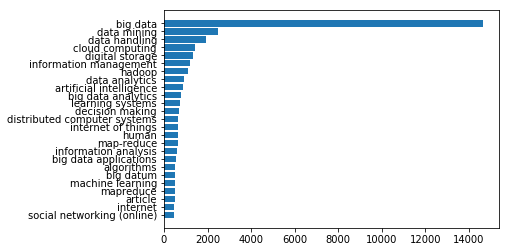

In [17]:
import matplotlib.pyplot as plt
keywords.reverse()
values.reverse()
plt.barh(keywords, values)
#plt.show()
plt.savefig('keywords.jpg')

In [18]:
%%writefile keywords.html
<!DOCTYPE html>
<html>
<head>
<title>Frecuencia de palabras clave</title>
</head>
<body>

<h1>Frecuencia de palabras clave desde Pig</h1>

<img src="keywords.jpg" alt="Sin(x)">

</body>
</html>


Overwriting keywords.html
